In [24]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [25]:
# directory path
directory_testing = "C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod"

# Check if the directory already exists
if not os.path.exists(directory_testing):
    # Create the directory
    os.makedirs(directory_testing)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

# directory path
directory_training = "C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod"

# Check if the directory already exists
if not os.path.exists(directory_training):
    # Create the directory
    os.makedirs(directory_training)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory created successfully!
Directory created successfully!


In [26]:
# Read baseline features
with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Feature/Baseline/baselineFeatures.csv', 'r') as f:          

    reader = csv.reader(f, delimiter='t')
    head = ''
    lines = []
    
    #For each subject
    for i, line in enumerate(reader):
        #Save header
        if i == 0:
            head = line
        else:
            #Create the testing file
            with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod/'+ str(i) + '.csv', 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(head)
                writer.writerow(line)
            file.close()
        
        #Save the data 
        lines.append(line)    

    
    to_write = []
    
    #For each subject
    for i in range(len(lines)):
        to_write = lines.copy()
        if i > 0:
            #Remove the subject who is in testing file
            to_write.remove(lines[i])
            #Create the training file
            with open('C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod/'+ str(i) + '.csv', 'w', newline='') as file:
                    writer = csv.writer(file)
                    for line in to_write:
                        writer.writerow(line)
            file.close()
        
    f.close      

In [27]:
# Directory path
directory_clustering = "ids_in_cluster"

# Check if the directory already exists
if not os.path.exists(directory_clustering):
    # Create the directory
    os.makedirs(directory_clustering)
    print("Directory created successfully!")
else:
    print("Directory already exists!")

Directory created successfully!


In [28]:
# Find id of subject in cluster 
def who_in_cluster(cluster_data, dataset):
    ids = []
    if len(cluster_data) == 0:
        return ids
    for data in dataset:
        for cluster_row in cluster_data:
            if np.array_equal(cluster_row, data[1:]):
                ids.append(int(data[0]))
                break
    return ids

def plot_clusters(datas, labels, centers, title, ids_cluster_1, ids_cluster_2):
    pca = PCA(n_components=2)
    datas_2d = pca.fit_transform(datas)
    
    # Plot points for each cluster with specific colors and labels
    plt.scatter(datas_2d[labels == 0, 0], datas_2d[labels == 0, 1], c='violet', label='Cluster 1')
    plt.scatter(datas_2d[labels == 1, 0], datas_2d[labels == 1, 1], c='green', label='Cluster 2')
    
    # Plot centroids
    centers_2d = pca.transform(centers)
    plt.scatter(centers_2d[:, 0], centers_2d[:, 1], s=300, c='red', alpha=0.5, label='Centroids')
    
    plt.legend()
    plt.title(title)
    plt.show()

    print(f"IDs of subjects in  {title} - Cluster 1: \n")
    print(ids_cluster_1)
    print("\n")

    print(f"IDs of subjects in {title} - Cluster 2: \n")
    print(ids_cluster_2)
    print("\n")


Dati nel Cluster 1:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209525e-01]
 [1.16150093e+00 2.27037809e-02 6.52046667e+01 6.57441925e-02]
 [4.48652467e-01 3.03744815e-03 7.40510000e+01 7.62624100e-01]]

Dati nel Cluster 2:
[[2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e

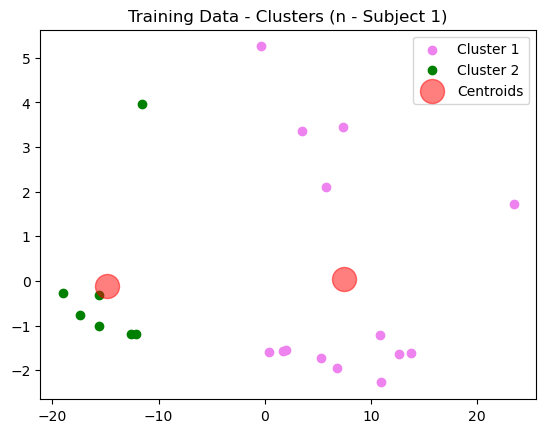

IDs of subjects in  Training Data - Clusters (n - Subject 1) - Cluster 1: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 1) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

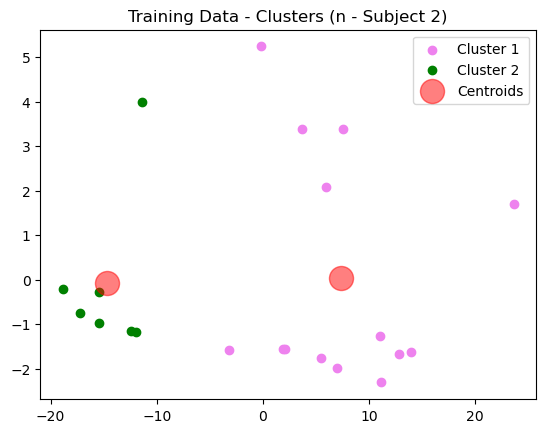

IDs of subjects in  Training Data - Clusters (n - Subject 2) - Cluster 1: 

[1, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 2) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

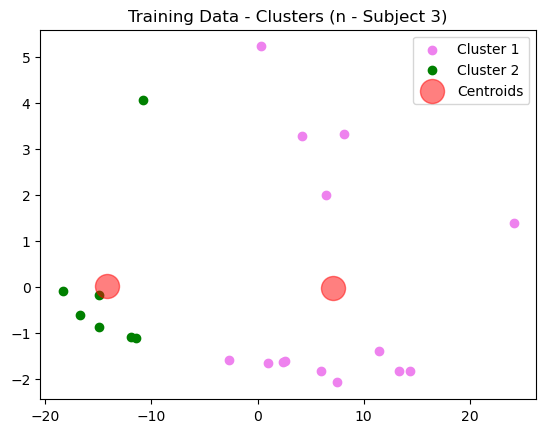

IDs of subjects in  Training Data - Clusters (n - Subject 3) - Cluster 1: 

[1, 2, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 3) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831

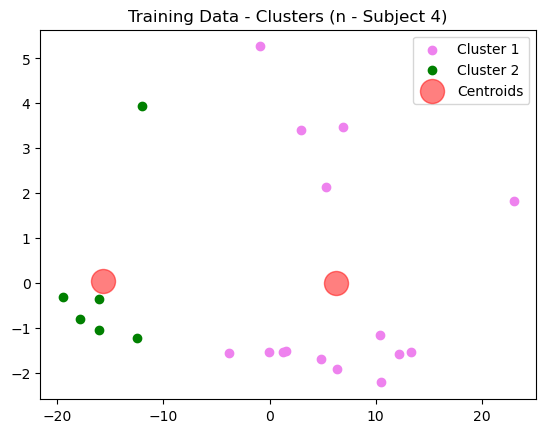

IDs of subjects in  Training Data - Clusters (n - Subject 4) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 4) - Cluster 2: 

[7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

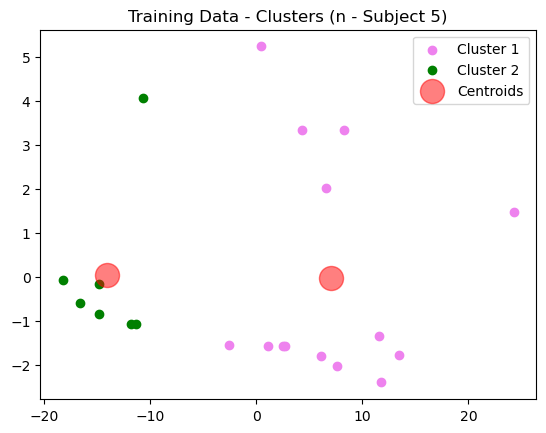

IDs of subjects in  Training Data - Clusters (n - Subject 5) - Cluster 1: 

[1, 2, 3, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 5) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

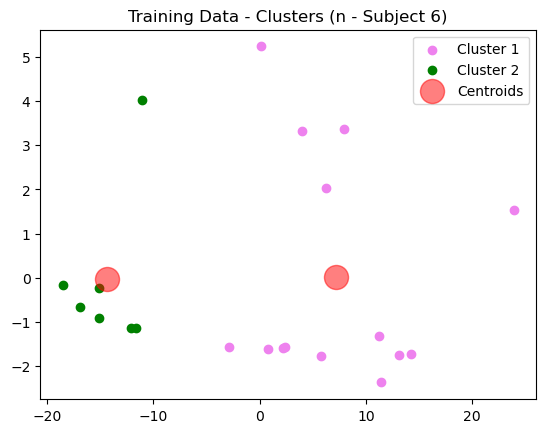

IDs of subjects in  Training Data - Clusters (n - Subject 6) - Cluster 1: 

[1, 2, 3, 5, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 6) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831

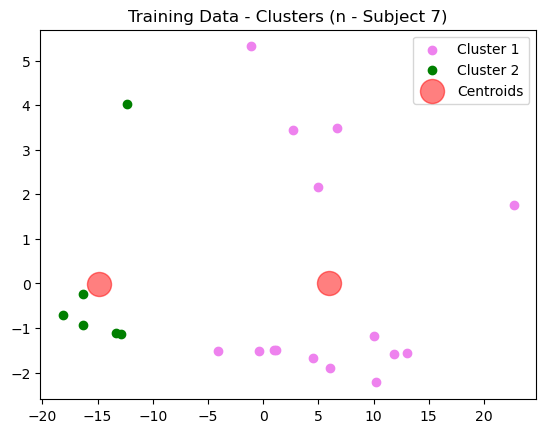

IDs of subjects in  Training Data - Clusters (n - Subject 7) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 7) - Cluster 2: 

[4, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

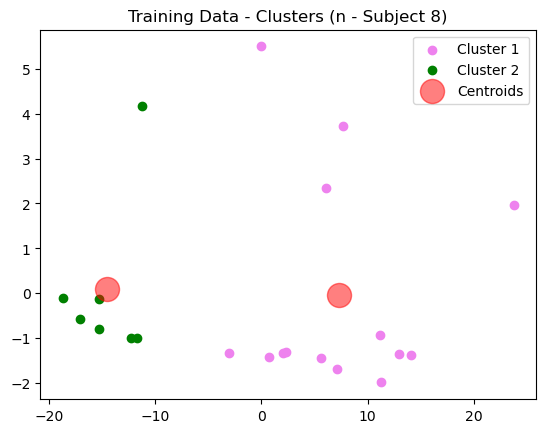

IDs of subjects in  Training Data - Clusters (n - Subject 8) - Cluster 1: 

[1, 2, 3, 5, 6, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 8) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831

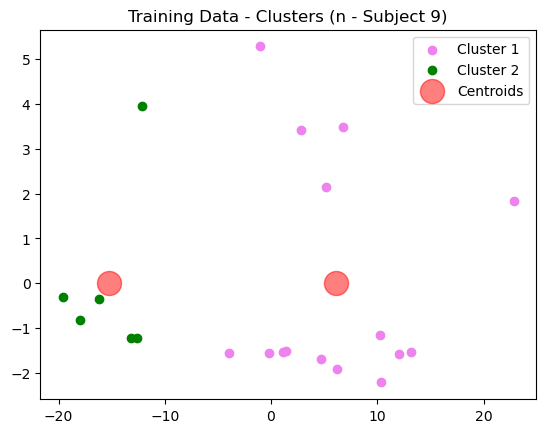

IDs of subjects in  Training Data - Clusters (n - Subject 9) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 9) - Cluster 2: 

[4, 7, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.65209

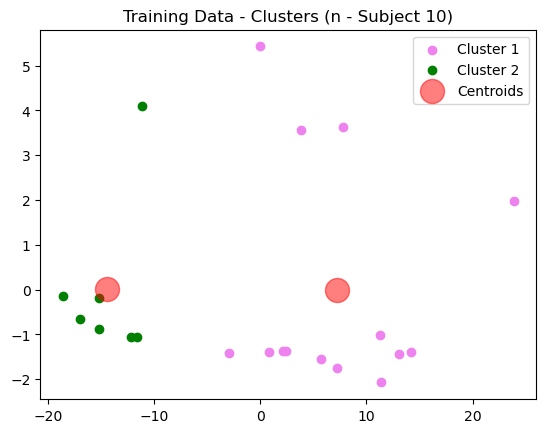

IDs of subjects in  Training Data - Clusters (n - Subject 10) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 10) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.59831463e-01]
 [4.28750242e-01 2.56903300e-03 7.06886667e+01 2.6520

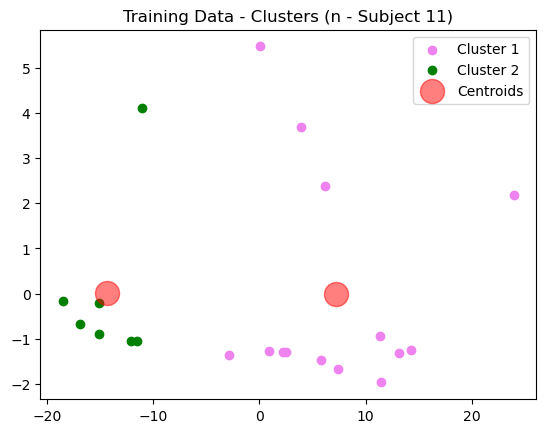

IDs of subjects in  Training Data - Clusters (n - Subject 11) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 11) - Cluster 2: 

[4, 7, 9, 12, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01 7.27493333e+01 2.24416014e+00]
 [4.23898708e+00 1.29782205e-01 7.04253333e+01 7.91322478e-01]
 [5.68851929e+00 1.17077594e-01 6.87953333e+01 1.14793167e-01]
 [7.16147113e+00 1.15548750e-01 7.66560000e+01 7.37108049e-01]
 [7.91019275e-01 1.04647401e-02 6.33660000e+01 4.88640620e-01]
 [4.48382961e+00 7.46137831e-02 5.27236667e+01 2.05856241e+00]
 [4.11217000e-01 2.49290657e-03 7.42683333e+01 9.5983

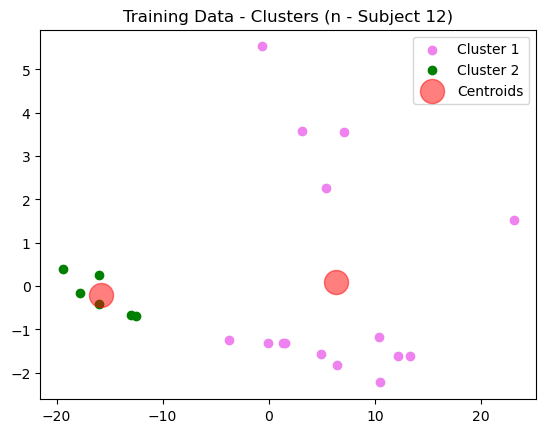

IDs of subjects in  Training Data - Clusters (n - Subject 12) - Cluster 1: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


IDs of subjects in Training Data - Clusters (n - Subject 12) - Cluster 2: 

[4, 7, 9, 17, 18, 21]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

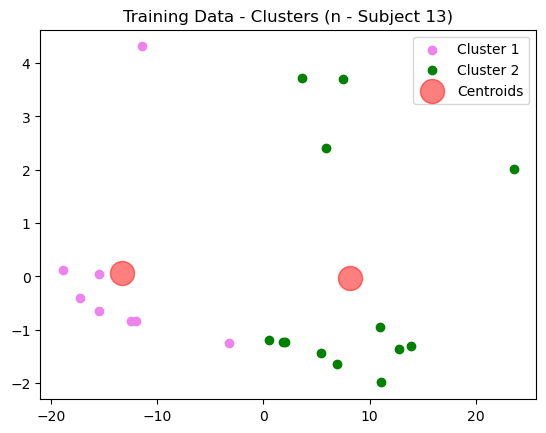

IDs of subjects in  Training Data - Clusters (n - Subject 13) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 13) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 14, 15, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

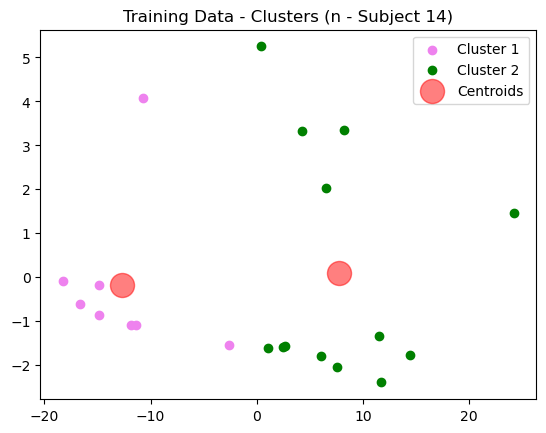

IDs of subjects in  Training Data - Clusters (n - Subject 14) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 14) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 15, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

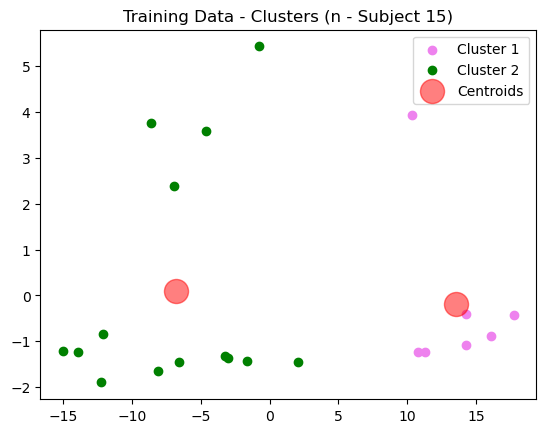

IDs of subjects in  Training Data - Clusters (n - Subject 15) - Cluster 1: 

[4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 15) - Cluster 2: 

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

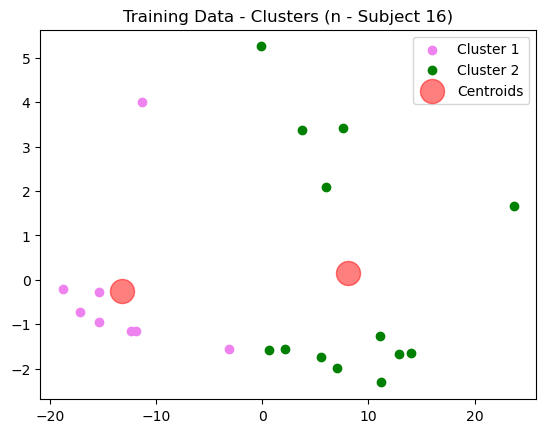

IDs of subjects in  Training Data - Clusters (n - Subject 16) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 16) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01

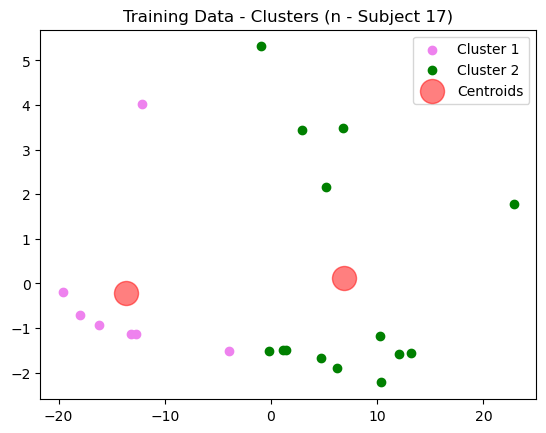

IDs of subjects in  Training Data - Clusters (n - Subject 17) - Cluster 1: 

[1, 4, 7, 9, 12, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 17) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01

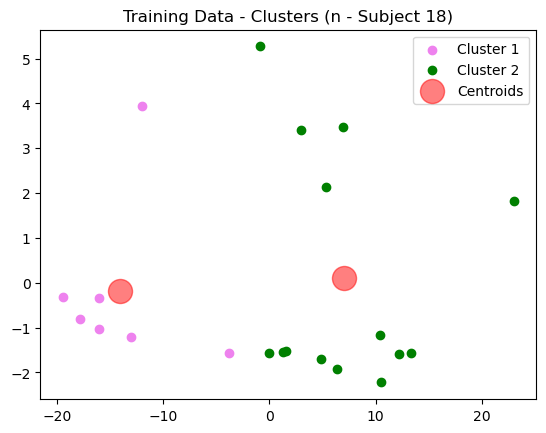

IDs of subjects in  Training Data - Clusters (n - Subject 18) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 21]


IDs of subjects in Training Data - Clusters (n - Subject 18) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

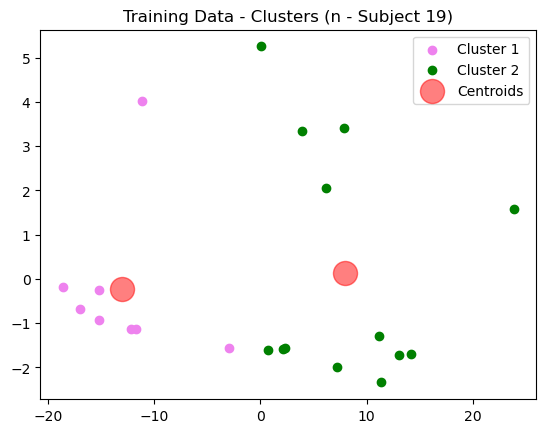

IDs of subjects in  Training Data - Clusters (n - Subject 19) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 19) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

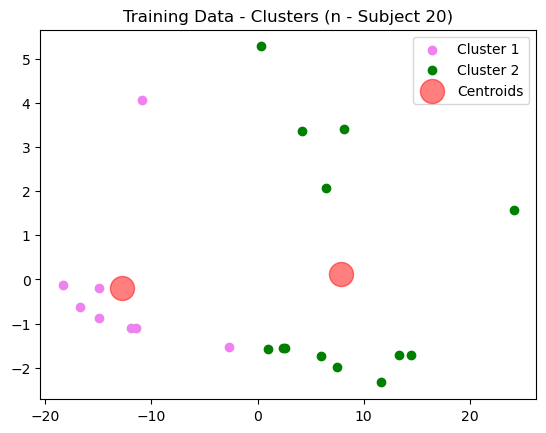

IDs of subjects in  Training Data - Clusters (n - Subject 20) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 20) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03 6.91570000e+01 4.99635384e-01]
 [5.33550108e+00 1.85988102e-01

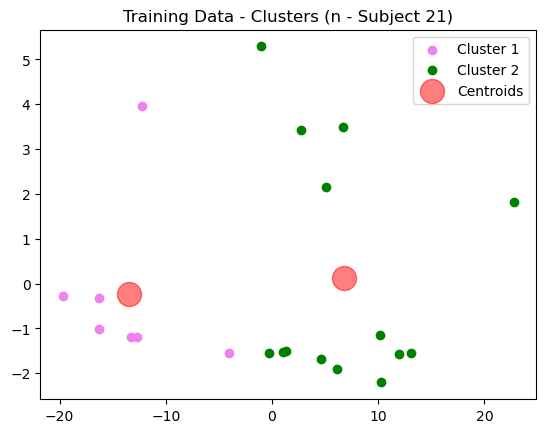

IDs of subjects in  Training Data - Clusters (n - Subject 21) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18]


IDs of subjects in Training Data - Clusters (n - Subject 21) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20, 22]


Dati nel Cluster 1:
[[2.27927700e-01 2.00494738e-03 7.93683333e+01 4.55314089e-01]
 [2.20875267e-01 3.04226088e-03 8.86226667e+01 8.49007263e-01]
 [8.85368733e-01 5.39843398e-03 9.50596667e+01 1.02038696e+00]
 [3.17449067e-01 8.08063535e-03 9.15863333e+01 4.51010233e-01]
 [5.41828693e+00 3.01542601e-01 8.77480000e+01 8.86357910e-01]
 [9.97481150e-01 2.63760551e-02 9.16290000e+01 5.82274672e-01]
 [2.51974858e-01 2.12547184e-03 8.80863333e+01 6.02423172e-01]
 [4.85618033e-01 8.54543107e-03 9.34116667e+01 3.46769160e-01]]

Dati nel Cluster 2:
[[2.61197733e-01 3.75390787e-03 7.56560000e+01 2.24711248e+00]
 [9.38318083e-02 2.59567274e-03 6.50366667e+01 3.63956547e-01]
 [7.99490208e-01 6.69247544e-02 6.22700000e+01 1.37550743e+00]
 [2.47280667e-01 2.47102966e-03

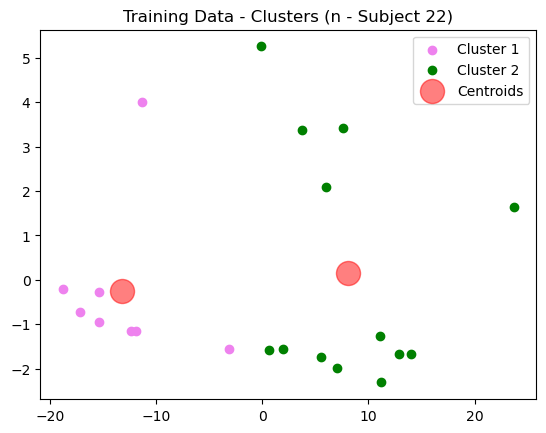

IDs of subjects in  Training Data - Clusters (n - Subject 22) - Cluster 1: 

[1, 4, 7, 9, 12, 17, 18, 21]


IDs of subjects in Training Data - Clusters (n - Subject 22) - Cluster 2: 

[2, 3, 5, 6, 8, 10, 11, 13, 14, 15, 16, 19, 20]




In [29]:
# training file
for i in range(1, 23):
    dataset = np.empty([0, 5])

    # Open the training file
    with open(f'C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForKMeansMethod/{i}.csv', 'r') as f:
        reader_training = csv.reader(f, delimiter='\t')
        datas = np.empty([0, 4])
        
        for j, subject_training in enumerate(reader_training):
            # Ignore header
            if j > 0:
                # Split the data
                for z, line in enumerate(subject_training):
                    dat = [list(map(float, line.split(',')))]
                    # Remove id
                    dat_no_idx = np.delete(dat, 0, 1)
                    # dataset with id
                    dataset = np.append(dataset, dat, axis=0)
                    # dataset without id
                    datas = np.append(datas, dat_no_idx, axis=0)
        
        # K-means on dataset without ids, with K=2
        kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(datas)
        
        
        #print('CENTERS \n', kmeans.cluster_centers_)
        cluster_1_indices = np.where(kmeans.labels_ == 0)[0]
        cluster_2_indices = np.where(kmeans.labels_ == 1)[0]

        print("Dati nel Cluster 1:")
        print(datas[cluster_1_indices])

        print("\nDati nel Cluster 2:")
        print(datas[cluster_2_indices])
        
        # Get IDs of subjects in Cluster 1
        ids_cluster_1 = who_in_cluster(datas[cluster_1_indices], dataset)
        
        
        # Get IDs of subjects in Cluster 2
        ids_cluster_2 = who_in_cluster(datas[cluster_2_indices], dataset)


       # Combine cluster indices for plotting
        combined_indices = np.concatenate((cluster_1_indices, cluster_2_indices))
        combined_labels = np.concatenate((np.zeros(len(cluster_1_indices)), np.ones(len(cluster_2_indices))))
        
        # Plot clusters
        plot_clusters(datas[combined_indices], combined_labels, kmeans.cluster_centers_, f'Training Data - Clusters (n - Subject {i})', ids_cluster_1, ids_cluster_2)

In [31]:
for i in range(1, 23):
    with open(f'C:/Users/Utente/Desktop/ClusteringICSE2label/Clustering/DatasForPredictMethod/{i}.csv', 'r') as f_test:
        reader_testing = csv.reader(f_test, delimiter='\t')
        datas_testing = np.empty([0, 4])
        dataset_testing = []
        predicted_data = []
        for x, subject_testing in enumerate(reader_testing):
            # Ignore header
            if x > 0:
                # Split the data
                for t, line in enumerate(subject_testing):
                    splitted = list(map(float, line.split(',')))
                    dataset_testing.append(splitted)  # Store the entire line
                    # Remove id
                    dat_test = np.delete([splitted], 0, 1)
                    # Create dataset without ids
                    datas_testing = np.append(datas_testing, dat_test, axis=0)
                    # Predict on testing data
        
        pred = kmeans.predict(datas_testing)
        for idx, label in enumerate(pred):
            print(f'Subject {i}, Data Point {idx+1} belongs to Cluster {label+1}\n')
        
        # Save predicted cluster data to file
        predicted_cluster = pred[0] + 1  # Adding 1 to make it 1-based indexing as per cluster number
        predicted_data = who_in_cluster(datas_testing, dataset_testing)
        
        #print(predicted_data)
        
        if (predicted_cluster == 1):
            ids_cluster_1 = who_in_cluster(datas[cluster_1_indices], dataset)
            # Salva gli ID nel file
            with open(f'ids_in_cluster/Run{i}_C1.csv', 'w', newline='') as file1:
                writer1 = csv.writer(file1)
                writer1.writerow(ids_cluster_1)

        # Ottieni gli ID dei soggetti nel Cluster 2
        if (predicted_cluster == 2):
            ids_cluster_2 = who_in_cluster(datas[cluster_2_indices], dataset)
            # Salva gli ID nel file
            with open(f'ids_in_cluster/Run{i}_C2.csv', 'w', newline='') as file2:
                writer2 = csv.writer(file2)
                writer2.writerow(ids_cluster_2)


Subject 1, Data Point 1 belongs to Cluster 1

Subject 2, Data Point 1 belongs to Cluster 2

Subject 3, Data Point 1 belongs to Cluster 2

Subject 4, Data Point 1 belongs to Cluster 1

Subject 5, Data Point 1 belongs to Cluster 2

Subject 6, Data Point 1 belongs to Cluster 2

Subject 7, Data Point 1 belongs to Cluster 1

Subject 8, Data Point 1 belongs to Cluster 2

Subject 9, Data Point 1 belongs to Cluster 1

Subject 10, Data Point 1 belongs to Cluster 2

Subject 11, Data Point 1 belongs to Cluster 2

Subject 12, Data Point 1 belongs to Cluster 1

Subject 13, Data Point 1 belongs to Cluster 2

Subject 14, Data Point 1 belongs to Cluster 2

Subject 15, Data Point 1 belongs to Cluster 2

Subject 16, Data Point 1 belongs to Cluster 2

Subject 17, Data Point 1 belongs to Cluster 1

Subject 18, Data Point 1 belongs to Cluster 1

Subject 19, Data Point 1 belongs to Cluster 2

Subject 20, Data Point 1 belongs to Cluster 2

Subject 21, Data Point 1 belongs to Cluster 1

Subject 22, Data Point